# Perceptron Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

In [2]:
def gen_perceptron_data(M, w_hat):
    """
    Hyperplane:
        xw = 0
        x1 = w0*x0/w1 <- Generate data here from w,b
    """
    x = np.random.uniform(-10, 10, size=[M, 2])
    y = np.where(x[:, 1] > -w_hat[0, 0] * x[:, 0] / w_hat[0, 1], 1., -1.)
    y = np.expand_dims(y, axis=1)
    return np.concatenate((x, y), axis=1)

In [3]:
M = 500 # num data points
w_hat = np.array([[1, 2]])
D = gen_perceptron_data(M, w_hat)
x0 = np.linspace(min(D[:, 0]), max(D[:, 0]))
x1_hat = -w_hat[0, 0] * x0 / w_hat[0, 1]
x0_rng = [min(x0) - 7., max(x0) + 7.]
x1_rng = [min(x1_hat) - 7., max(x1_hat) + 7.]

In [4]:
from IPython.display import clear_output

plt.rcParams['figure.figsize'] = [12, 8]

def plot_hyperplane(w, pause=0.25):
    clear_output()
    plt.clf()
    plt.scatter(D[:, 0], D[:, 1], c=D[:, 2])
    x1 = -w[0, 0] * x0 / w[0, 1]
    plt.plot(x0, x1, 'g--', label='current');
    plt.plot(x0, x1_hat, 'r--', label='original');
    plt.xlim(*x0_rng)
    plt.ylim(*x1_rng)
    plt.legend()
    plt.show();
    plt.pause(pause);

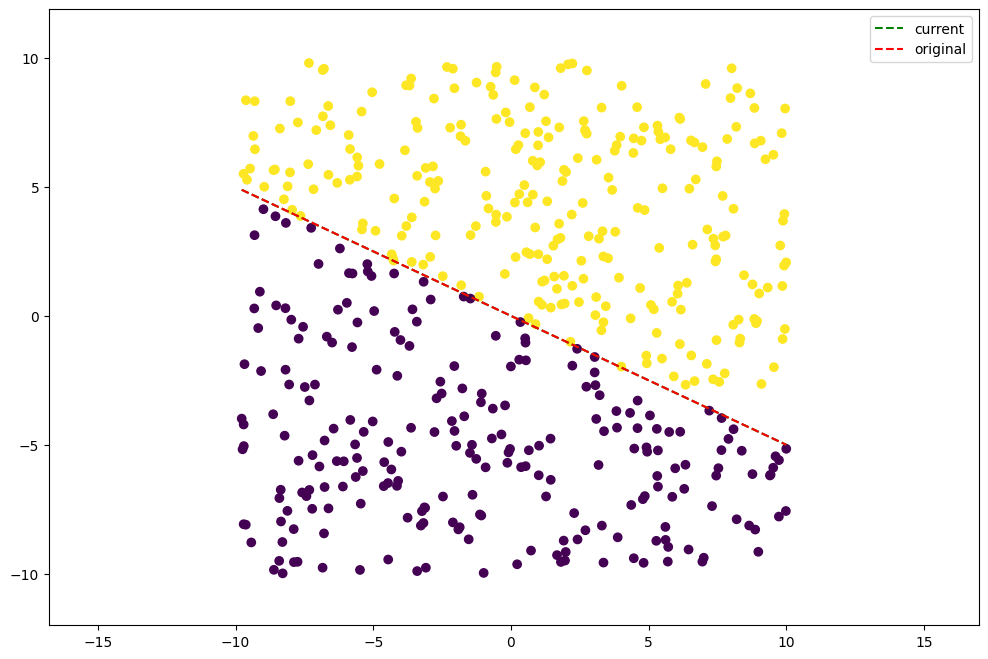

In [5]:
w = np.zeros(shape=[1,2])
lr = 1.0
plot_hyperplane(w)
while True:
    c = 0
    for point in D:
        y = point[-1]
        x = np.array([point[:2]])
        if y * x.dot(w.T) <= 0.:
            c += 1
            w += lr * y * x
            plot_hyperplane(w)
    if not c:
        break